In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

### Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.


#### Min-Max scaling is a part of Feature scaling to transform data into a normalized data in Min-Max scaling values of whole columns are shifted so that they are bounded btw a fixed value i.e 0 - 1 
#### Min-Max scaling widely used in DeepLearning, Computer vision and Image Processing

$$
    x_{std} = \frac{x_i - x_{min}}{x_{max} - x_{min}}\\\\
    x_{scaled} = {x_{std}}*(max-min) + min
$$

#### It scales the values to a specific value range without changing the shape of the original distribution

In [3]:
from sklearn.preprocessing import MinMaxScaler

data = [[11, 2], [3, 7], [0, 10], [11, 8]]

scaler = MinMaxScaler()
model=scaler.fit(data)
scaled_data=model.transform(data)

print(scaled_data)
# scaled data now in range of 0 to 1

[[1.         0.        ]
 [0.27272727 0.625     ]
 [0.         1.        ]
 [1.         0.75      ]]


### Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.


#### Just like MinMax Scaling Unit Vector also converts the values btw 0 and 1 & -1 to 1 when there is -ve values in our data

- Key difference btw MinMax & UnitVector
 - for L1 Normalization each column converted so absolute sum of their values along row = 1
 - for L2 Norm, each column are 1st squared then added so absolute sum along row = 1


In [4]:
df = pd.DataFrame({
    'Income': [15000, 1800, 120000, 10000],
    'Age': [25, 18, 42, 51],
    'Department': ['HR','Legal','Marketing','Management']
})
df_scaled = df.copy()
col_names = ['Income','Age']
features = df_scaled[col_names]
df_scaled

,Income,Age,Department
0,15000,25,HR
1,1800,18,Legal
2,120000,42,Marketing
3,10000,51,Management


In [5]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm = 'l2')
# default norm also l2

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.999999,0.001667,HR
1,0.999950,0.010000,Legal
2,1.000000,0.000350,Marketing
3,0.999987,0.005100,Management


### Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.


#### PCA transform high-dimension data into lower dimension retaining as much info as possible. Ex from 3-Dimensional scatterplot to 2d plot

##### Extremly usefull when datasets have lot of features 
- Applications:
 - Image processing
 - Genome research

Writing a 1000 page book summary in 2-3 pages basically summarization

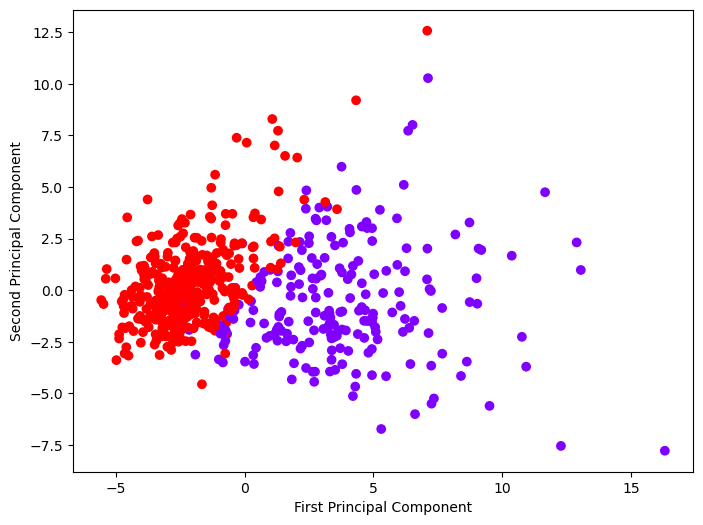

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Loading data
raw_data = load_breast_cancer()
raw_data.values()
raw_data.keys()
raw_data.DESCR
#adding data to dataFrame
data = pd.DataFrame(raw_data['data'],columns=raw_data['feature_names'])
data.head()

#standardization of data
cl = StandardScaler()
data_scaled = cl.fit_transform(data)
data_scaled.shape

#Dimensionality reduction from 30 to 2
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data_pca
pca.components_
pca.explained_variance_,pca.explained_variance_ratio_

# Ploting our PCA generated features
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0],data_pca[:,1],c = raw_data['target'],cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.


PCA is a dimensionality reduction technique, However, PCA can be used as a tool within a feature extraction pipeline.

Feature extraction refers to the process of selecting or creating a set of informative features from the original data. The goal is to capture the most relevant information while reducing dimensionality and eliminating noise. Feature extraction methods can include techniques like statistical measures, wavelet transforms, or deep learning architectures.

PCA is a mathematical procedure that transforms a high-dimensional dataset into a new set of orthogonal variables called principal components. These principal components are linear combinations of the original features and are ordered in terms of the amount of variance they explain in the data.PCA re-expresses the data in a different coordinate system.

However, PCA can indirectly assist with feature extraction. Here's how:

1. Dimensionality reduction: By selecting a subset of the principal components that capture most of the variance, you effectively reduce the dimensionality of the data.

2. Feature selection: After applying PCA, you can examine the contribution of each original feature to the principal components. Features that have higher loadings on the principal components are considered more important in capturing the variance. You can then select a subset of these original features as the extracted features for further analysis.

3. Feature engineering: PCA can also guide feature engineering efforts. By understanding the relationships between the original features and the principal components, you may gain insights into creating new informative features. These new features can be derived from the original features or based on domain-specific knowledge.

Example and use case explained in previous Question's Answer

### Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.


In [7]:
# creating a dataset containing required features and some values 
features = ['Prices','Ratings']
values = [[1231,4.1],[134,4.5],[438,3.8]]
raw_data = pd.DataFrame(data = values, columns= features)
raw_data['Delivery Time'] = pd.to_timedelta(['00:18:23','00:23:21','00:08:23'])
raw_data['Delivery Time'] = raw_data['Delivery Time'].dt.total_seconds()
raw_data

,Prices,Ratings,Delivery Time
0,1231,4.1,1103.0
1,134,4.5,1401.0
2,438,3.8,503.0


In [8]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(raw_data)
df_scaled = pd.DataFrame(scaled_data, columns=  raw_data.columns)
df_scaled

,Prices,Ratings,Delivery Time
0,1.000000,0.428571,0.668151
1,0.000000,1.000000,1.000000
2,0.277119,0.000000,0.000000


### Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.


In [9]:
# creating a dataset containing required features and some values 
companies = ['Company A', 'Company B', 'Company C', 'Company D', 'Company E']

# Set random seed for reproducibility
np.random.seed(123)

revenue = np.random.randint(100, 301, size=len(companies))
expenses = np.random.randint(60, 181, size=len(companies))
stock_price = np.random.randint(10, 21, size=len(companies))
market_cap = np.random.randint(5, 11, size=len(companies))

# Create a dictionary to hold the data
data = {
    'Revenue (in millions)': revenue,
    'Expenses (in millions)': expenses,
    'Profit (in millions)': revenue-expenses,
    'Stock Price (in dollars)': stock_price,
    'Market Cap (in billions)': market_cap,
}

df = pd.DataFrame(data,index=companies)
df

,Revenue (in millions),Expenses (in millions),Profit (in millions),Stock Price (in dollars),Market Cap (in billions)
Company A,209,143,66,10,6
Company B,226,166,60,11,8
Company C,166,117,49,19,10
Company D,198,146,52,10,9
Company E,117,157,-40,10,5


   PCA Feature 1  PCA Feature 2
0       0.144658      -0.966017
1      -0.008001      -1.618758
2      -2.423028       1.744899
3      -0.422818      -0.663902
4       2.709189       1.503778


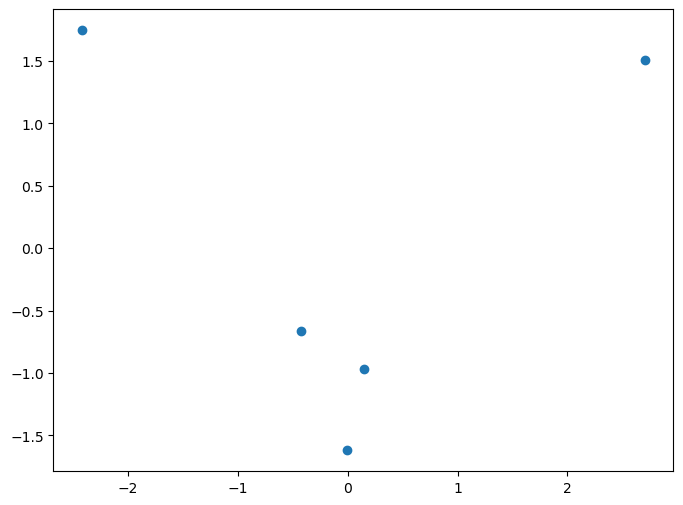

In [10]:
# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

#PCA
pca_ = PCA(2)
pca_data = pca_.fit_transform(scaled_data)
df_pca = pd.DataFrame(pca_data,columns = ['PCA Feature 1','PCA Feature 2'])
print(df_pca)

plt.figure(figsize=(8,6))
plt.scatter(df_pca['PCA Feature 1'],df_pca['PCA Feature 2'])
plt.show()

### Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.


In [11]:
df = pd.DataFrame([1,5,10,15,20])
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data)
df_scaled

,0
0,-1.000000
1,-0.578947
2,-0.052632
3,0.473684
4,1.000000


### Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?

In [12]:
np.random.seed(123)

# Define the number of samples
num_samples = 100

height = np.random.normal(170, 10, num_samples).round(2)
weight = np.random.normal(65, 15, num_samples).round(2)
age = np.random.randint(20, 60, num_samples)
gender = np.random.choice(['1', '0'], num_samples) # 1:Male , 0: female
blood_pressure = np.random.randint(80, 140, num_samples)

# Create a dictionary to hold the data
data = {
    'Height': height,
    'Weight': weight,
    'Age': age,
    'Gender': gender,
    'Blood Pressure': blood_pressure
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

Principal Component 1: 0.270
Principal Component 2: 0.232
Principal Component 3: 0.192
Principal Component 4: 0.164
Principal Component 5: 0.143


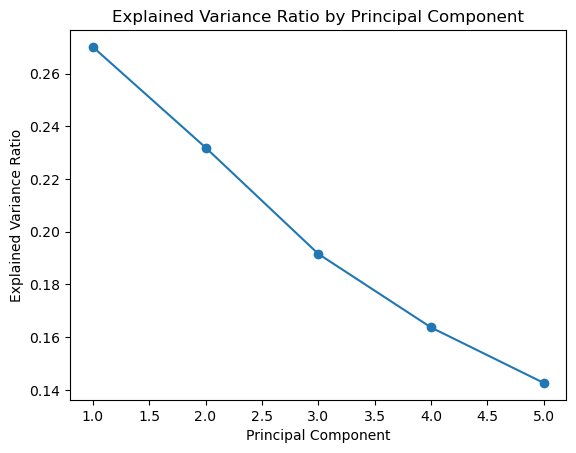

In [13]:
# Standardization of data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

# applying PCA for dimensionality reduction
pca_ = PCA()
data_pca = pca_.fit_transform(scaled_data)

# Calculate the explained variance ratio
explained_variance_ratio  = pca_.explained_variance_ratio_

for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.3f}")

# Plot the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()
